## Zomato Bangalore Restaurants Prediction
The basic idea of analyzing the Zomato dataset is to get a fair idea about the factors affecting the establishment
of different types of restaurant at different places in Bengalur.

In [1]:
DF_PATH = '../data/raw/zomato.csv'
DF_SAVE_PATH = '../data/processed/analytics_zomato_processed.csv'

### Import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

**To do list:**
- Drop unneeded features: (url, address, phone, dish_liked, reviews_list, menu_item).
- Fix (rate, approx_cost) features problems.
- Remove duplicated rows.
- Save the prepared data into csv file.

----------------------

### Read dataframe

In [3]:
df = pd.read_csv(DF_PATH)
df.sample(3)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
47781,https://www.zomato.com/bangalore/bootlegger-la...,"36, Vittal Mallya Road, Lavelle Road, Bangalore",Bootlegger,No,No,4.1 /5,1546,+91 8022290099\n+91 8041462747,Lavelle Road,Pub,"Beer, Cocktails, Beef Steak, Beef Chilli, Nach...","Continental, Steak","1,200","[('Rated 2.0', 'RATED\n Bootlegger is undoubt...",[],Delivery,Residency Road
26329,https://www.zomato.com/bangalore/balle-balle-d...,"1, Near Canopy Apartment, Horamavu Agara Main ...",Balle Balle Dhaba,Yes,No,3.6 /5,199,+91 8884021333\n+91 8197997380,Kalyan Nagar,Quick Bites,"Paratha, Chicken Biryani, Butter Chicken, Lass...","North Indian, Chinese",500,"[('Rated 3.0', 'RATED\n Tried dal makhani , b...",[],Dine-out,Kammanahalli
48471,https://www.zomato.com/bangalore/adda-shanti-n...,"16.8th Cross, H Siddaiha Road, Sudamnagar, Sha...",Adda,No,No,3.3 /5,5,+91 9886686948,Shanti Nagar,Quick Bites,NaN,South Indian,300,"[('Rated 4.5', 'RATED\n Nice place to have fo...",[],Dine-out,Residency Road


### Drop unneeded features: (url, address, phone, dish_liked, reviews_list, menu_item)

In [4]:
cols_to_drop = ['url', 'address', 'phone', 'dish_liked', 'reviews_list', 'menu_item']
df.drop(cols_to_drop, axis = 1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         51717 non-null  object
 1   online_order                 51717 non-null  object
 2   book_table                   51717 non-null  object
 3   rate                         43942 non-null  object
 4   votes                        51717 non-null  int64 
 5   location                     51696 non-null  object
 6   rest_type                    51490 non-null  object
 7   cuisines                     51672 non-null  object
 8   approx_cost(for two people)  51371 non-null  object
 9   listed_in(type)              51717 non-null  object
 10  listed_in(city)              51717 non-null  object
dtypes: int64(1), object(10)
memory usage: 4.3+ MB


### Fix (rate, approx_cost) features problems.

In [5]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [6]:
def fix_rate(rate):
    try:
        return float(rate[0:3])
    except:
        return np.nan

In [7]:
df['rate'].apply(fix_rate).unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, nan, 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2,
       2.3, 4.8, 4.9, 2.1, 2. , 1.8])

In [8]:
df['rate'] = df['rate'].apply(fix_rate)

In [9]:
df['rate'].describe()

count    41665.000000
mean         3.700449
std          0.440513
min          1.800000
25%          3.400000
50%          3.700000
75%          4.000000
max          4.900000
Name: rate, dtype: float64

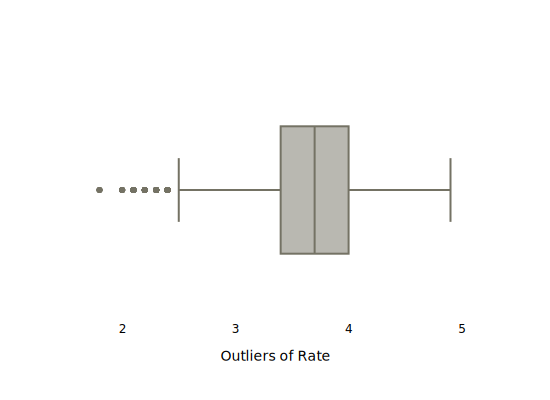

In [10]:
fig = px.box(data_frame = df, x = 'rate', color_discrete_sequence = ['#747264'])
fig.update_layout(height = 400, width = 550, plot_bgcolor = '#ffffff', font = dict(color = 'black'))
fig.update_xaxes(title = 'Outliers of Rate')
fig.show(renderer = 'svg')

>**Note:** The problem has been fixed, and this outliers are business outliers have meaning we can't drop it.

In [11]:
df['approx_cost(for two people)'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', nan, '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [12]:
df['approx_cost(for two people)'].astype(str).apply(lambda c : float(c.replace(",", ""))).unique()

array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        900.,  200.,  750.,  150.,  850.,  100., 1200.,  350.,  250.,
        950., 1000., 1500., 1300.,  199.,   80., 1100.,  160., 1600.,
        230.,  130.,   50.,  190., 1700.,   nan, 1400.,  180., 1350.,
       2200., 2000., 1800., 1900.,  330., 2500., 2100., 3000., 2800.,
       3400.,   40., 1250., 3500., 4000., 2400., 2600.,  120., 1450.,
        469.,   70., 3200.,   60.,  560.,  240.,  360., 6000., 1050.,
       2300., 4100., 5000., 3700., 1650., 2700., 4500.,  140.])

In [13]:
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].astype(str).apply(lambda c : float(c.replace(",", "")))

In [14]:
df['approx_cost(for two people)'].describe()

count    51371.000000
mean       555.431566
std        438.850728
min         40.000000
25%        300.000000
50%        400.000000
75%        650.000000
max       6000.000000
Name: approx_cost(for two people), dtype: float64

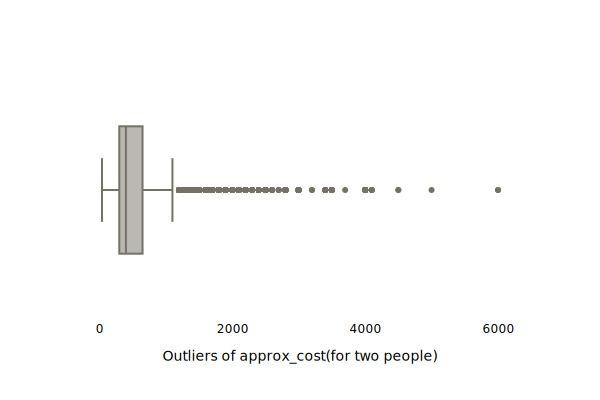

In [15]:
fig = px.box(data_frame = df, x = 'approx_cost(for two people)', color_discrete_sequence = ['#747264'])
fig.update_layout(height = 400, width = 600, plot_bgcolor = '#ffffff', font = dict(color = 'black'))
fig.update_xaxes(title = 'Outliers of approx_cost(for two people)')
fig.show(renderer = 'svg')

>**Note:** Same as rate, the approx_cost problem has been solved, and it's outliers are needed.

### Remove duplicated rows

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         51717 non-null  object 
 1   online_order                 51717 non-null  object 
 2   book_table                   51717 non-null  object 
 3   rate                         41665 non-null  float64
 4   votes                        51717 non-null  int64  
 5   location                     51696 non-null  object 
 6   rest_type                    51490 non-null  object 
 7   cuisines                     51672 non-null  object 
 8   approx_cost(for two people)  51371 non-null  float64
 9   listed_in(type)              51717 non-null  object 
 10  listed_in(city)              51717 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 4.3+ MB


In [17]:
df.duplicated().sum()

108

In [18]:
df.drop_duplicates(inplace = True)

In [19]:
df.duplicated().sum()

0

### Save the prepared data into csv file

In [20]:
df.to_csv(DF_SAVE_PATH, index = False)

**Conclusion:**
- We fixed done our analytics preperation for data.
- Next, To do is EDA and analytics.